In [2]:
 !pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 26.0MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=d54f69045fd1985c08ab8dd00e1ed8e6f454fdf1f8771565d8d7ce6dda11ac06
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import statistics as stat
from sklearn.impute import SimpleImputer

In [4]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions 
# Create the three fuzzy variables - two inputs, one output
COUGH =ctrl.Antecedent(np.arange(0, 110, 1),'COUGH')
MUSCLE_ACHES =ctrl.Antecedent(np.arange(0, 100, 1),'MUSCLE_ACHES')
TIREDNESS =ctrl.Antecedent(np.arange(0, 110, 1),'TIREDNESS')
SORE_THROAT =ctrl.Antecedent(np.arange(0, 100, 1),'SORE_THROAT')
RUNNY_NOSE =ctrl.Antecedent(np.arange(0, 110, 1),'RUNNY_NOSE')
STUFFY_NOSE =ctrl.Antecedent(np.arange(0, 100, 1),'STUFFY_NOSE')
FEVER =ctrl.Antecedent(np.arange(0, 110, 1),'FEVER')
NAUSEA =ctrl.Antecedent(np.arange(0, 100, 1),'NAUSEA')
VOMITING =ctrl.Antecedent(np.arange(0, 110, 1),'VOMITING')
DIARRHEA =ctrl.Antecedent(np.arange(0, 100, 1),'DIARRHEA')
SHORTNESS_OF_BREATH =ctrl.Antecedent(np.arange(0, 110, 1),'SHORTNESS_OF_BREATH')
DIFFICULTY_BREATHING =ctrl.Antecedent(np.arange(0, 100, 1),'DIFFICULTY_BREATHING')
LOSS_OF_TASTE =ctrl.Antecedent(np.arange(0, 110, 1),'LOSS_OF_TASTE')
LOSS_OF_SMELL =ctrl.Antecedent(np.arange(0, 100, 1),'LOSS_OF_SMELL')
ITCHY_NOSE =ctrl.Antecedent(np.arange(0, 110, 1),'ITCHY_NOSE')
ITCHY_EYES =ctrl.Antecedent(np.arange(0, 100, 1),'ITCHY_EYES')
ITCHY_MOUTH =ctrl.Antecedent(np.arange(0, 110, 1),'ITCHY_MOUTH')
ITCHY_INNER_EAR =ctrl.Antecedent(np.arange(0, 100, 1),'ITCHY_INNER_EAR')
SNEEZING =ctrl.Antecedent(np.arange(0, 110, 1),'SNEEZING')
PINK_EYE =ctrl.Antecedent(np.arange(0, 100, 1),'PINK_EYE')



TYPE = ctrl.Consequent(np.arange(0, 100, 1), 'TYPE')

In [9]:
# Auto-membership function population is possible with .automf(0 ,1)
names = ['no','yes']
COUGH.automf(names=names)
MUSCLE_ACHES.automf(names=names)
TIREDNESS.automf(names=names)
SORE_THROAT.automf(names=names)
RUNNY_NOSE.automf(names=names)
STUFFY_NOSE.automf(names=names)
FEVER.automf(names=names)
NAUSEA.automf(names=names)
VOMITING.automf(names=names)
DIARRHEA.automf(names=names)
SHORTNESS_OF_BREATH.automf(names=names)
DIFFICULTY_BREATHING.automf(names=names)
LOSS_OF_TASTE.automf(names=names)
LOSS_OF_SMELL.automf(names=names)
ITCHY_NOSE.automf(names=names)
ITCHY_EYES.automf(names=names)
ITCHY_MOUTH.automf(names=names)
ITCHY_INNER_EAR.automf(names=names)
SNEEZING.automf(names=names)
PINK_EYE.automf(names=names)


In [7]:
# Custom membership functions built for output TYPE.
TYPE['ALLERGY'] = fuzz.trapmf(TYPE.universe, [0, 0, 20,40])
TYPE['COVID'] = fuzz.trimf(TYPE.universe, [20, 50,80])
TYPE['FLU'] = fuzz.trapmf(TYPE.universe, [60, 80, 100,100])

/usr/local/lib/python3.7/dist-packages/skfuzzy/control/visualization.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig, self.ax = plt.subplots()


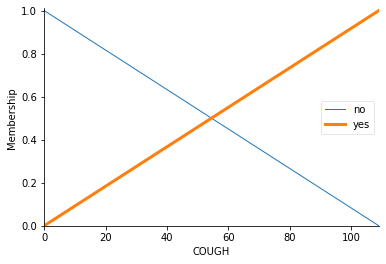

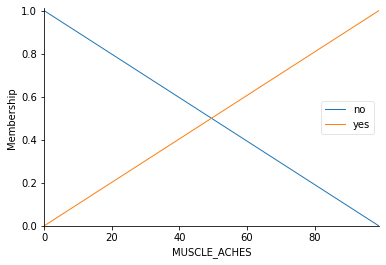

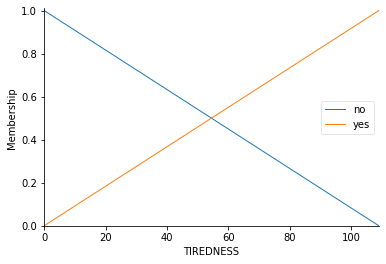

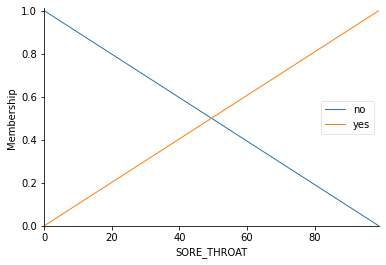

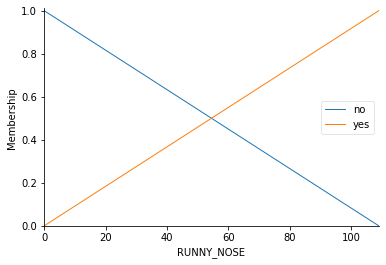

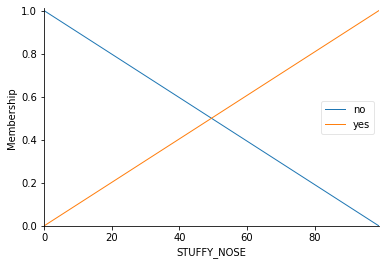

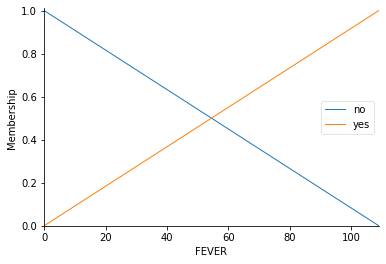

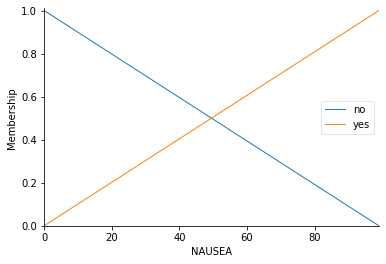

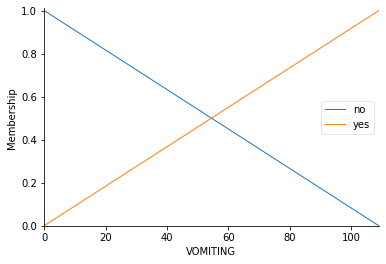

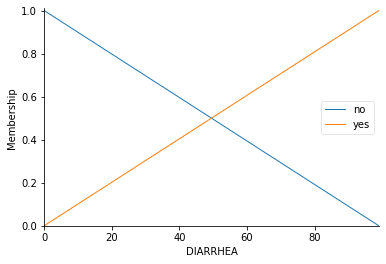

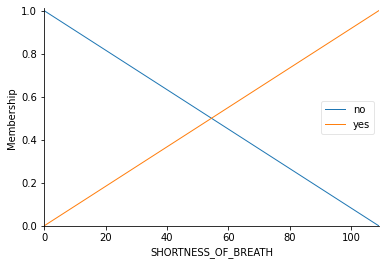

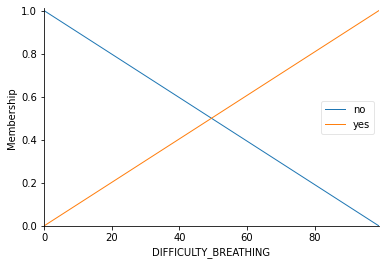

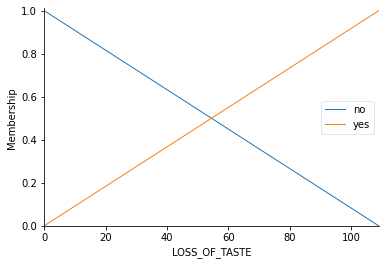

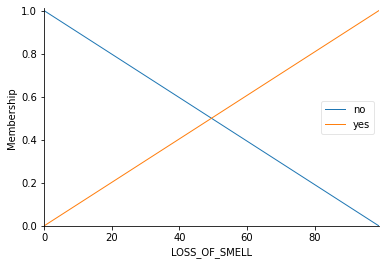

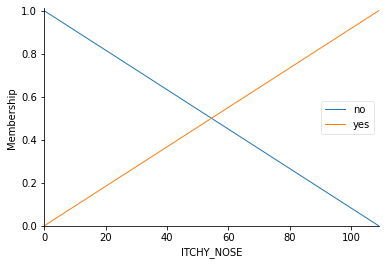

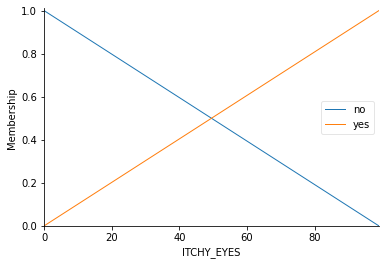

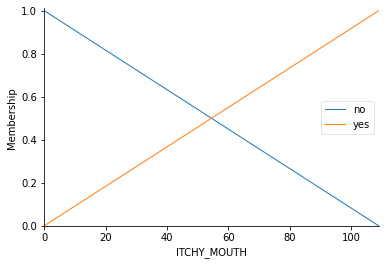

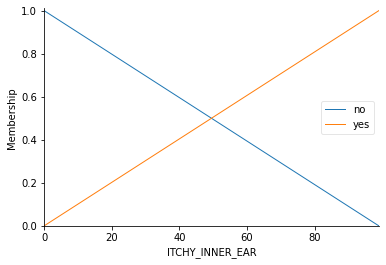

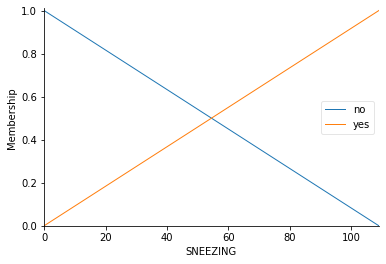

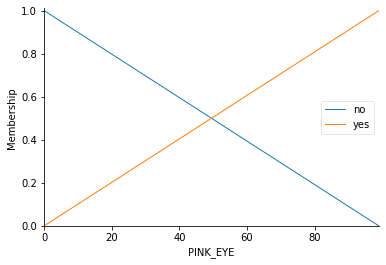

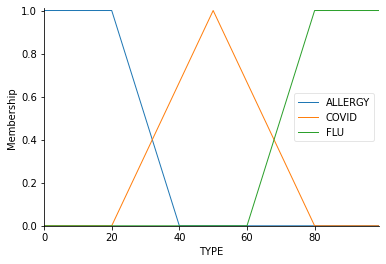

In [11]:
# You can see how these look with .view()
COUGH['yes'].view()
MUSCLE_ACHES.view()
TIREDNESS.view()
SORE_THROAT.view()
RUNNY_NOSE.view()
STUFFY_NOSE.view()
FEVER.view()
NAUSEA.view()
VOMITING.view()
DIARRHEA.view()
SHORTNESS_OF_BREATH.view()
DIFFICULTY_BREATHING.view()
LOSS_OF_TASTE.view()
LOSS_OF_SMELL.view()
ITCHY_NOSE.view()
ITCHY_EYES.view()
ITCHY_MOUTH.view()
ITCHY_INNER_EAR.view()
SNEEZING.view()
PINK_EYE.view()

TYPE.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe0247d5310>)

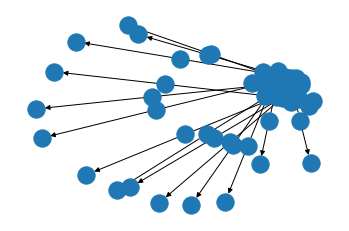

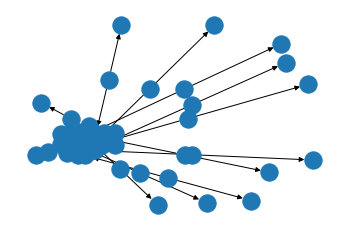

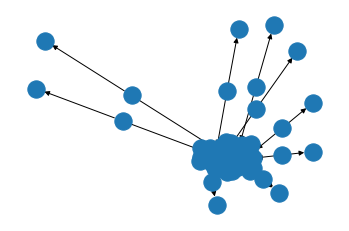

In [12]:
#Define Rules
rule0 = ctrl.Rule(antecedent=(
    (COUGH['no'] & MUSCLE_ACHES['no'] & TIREDNESS['yes'] & SORE_THROAT['no'] & RUNNY_NOSE['yes']& STUFFY_NOSE['no']& FEVER['no']& NAUSEA['no']& VOMITING['no']& DIARRHEA['no']& SHORTNESS_OF_BREATH['no']& DIFFICULTY_BREATHING['no']& LOSS_OF_TASTE['yes']& LOSS_OF_SMELL['no']& ITCHY_NOSE['yes']& ITCHY_EYES['no']& ITCHY_MOUTH['no']& ITCHY_INNER_EAR['yes']& SNEEZING['no']& PINK_EYE['yes']) |
    (COUGH['no'] & MUSCLE_ACHES['no'] & TIREDNESS['yes'] & SORE_THROAT['no'] & RUNNY_NOSE['no']& STUFFY_NOSE['no']& FEVER['no']& NAUSEA['no']& VOMITING['no']& DIARRHEA['no']& SHORTNESS_OF_BREATH['no']& DIFFICULTY_BREATHING['no']& LOSS_OF_TASTE['yes']& LOSS_OF_SMELL['no']& ITCHY_NOSE['yes']& ITCHY_EYES['no']& ITCHY_MOUTH['yes']& ITCHY_INNER_EAR['yes']& SNEEZING['yes']& PINK_EYE['yes']) |
    (COUGH['no'] & MUSCLE_ACHES['yes'] & TIREDNESS['yes'] & SORE_THROAT['yes'] & RUNNY_NOSE['no']& STUFFY_NOSE['no']& FEVER['no']& NAUSEA['no']& VOMITING['no']& DIARRHEA['no']& SHORTNESS_OF_BREATH['no']& DIFFICULTY_BREATHING['no']& LOSS_OF_TASTE['yes']& LOSS_OF_SMELL['no']& ITCHY_NOSE['yes']& ITCHY_EYES['no']& ITCHY_MOUTH['no']& ITCHY_INNER_EAR['no']& SNEEZING['no']& PINK_EYE['yes'])),
    
    consequent=TYPE['ALLERGY'], label='rule ALLERGY')

rule1 = ctrl.Rule(antecedent=(
    (COUGH['yes'] & MUSCLE_ACHES['no'] & TIREDNESS['no'] & SORE_THROAT['yes'] & RUNNY_NOSE['no']& STUFFY_NOSE['no']& FEVER['yes']& NAUSEA['no']& VOMITING['no']& DIARRHEA['yes']& SHORTNESS_OF_BREATH['no']& DIFFICULTY_BREATHING['yes']& LOSS_OF_TASTE['no']& LOSS_OF_SMELL['no']& ITCHY_NOSE['no']& ITCHY_EYES['no']& ITCHY_MOUTH['no']& ITCHY_INNER_EAR['no']& SNEEZING['yes']& PINK_EYE['no']) |
    (COUGH['yes'] & MUSCLE_ACHES['no'] & TIREDNESS['yes'] & SORE_THROAT['no'] & RUNNY_NOSE['no']& STUFFY_NOSE['no']& FEVER['no']& NAUSEA['no']& VOMITING['no']& DIARRHEA['yes']& SHORTNESS_OF_BREATH['yes']& DIFFICULTY_BREATHING['no']& LOSS_OF_TASTE['no']& LOSS_OF_SMELL['no']& ITCHY_NOSE['no']& ITCHY_EYES['no']& ITCHY_MOUTH['no']& ITCHY_INNER_EAR['no']& SNEEZING['no']& PINK_EYE['no']) |
    (COUGH['no'] & MUSCLE_ACHES['no'] & TIREDNESS['yes'] & SORE_THROAT['no'] & RUNNY_NOSE['no']& STUFFY_NOSE['no']& FEVER['yes']& NAUSEA['no']& VOMITING['yes']& DIARRHEA['no']& SHORTNESS_OF_BREATH['yes']& DIFFICULTY_BREATHING['no']& LOSS_OF_TASTE['no']& LOSS_OF_SMELL['no']& ITCHY_NOSE['no']& ITCHY_EYES['no']& ITCHY_MOUTH['no']& ITCHY_INNER_EAR['no']& SNEEZING['no']& PINK_EYE['no'])),
    
    consequent=TYPE['COVID'], label='rule COVID')

rule2 = ctrl.Rule(antecedent=(
    (COUGH['no'] & MUSCLE_ACHES['yes'] & TIREDNESS['no'] & SORE_THROAT['yes'] & RUNNY_NOSE['yes']& STUFFY_NOSE['yes']& FEVER['yes']& NAUSEA['no']& VOMITING['no']& DIARRHEA['yes']& SHORTNESS_OF_BREATH['no']& DIFFICULTY_BREATHING['no']& LOSS_OF_TASTE['yes']& LOSS_OF_SMELL['no']& ITCHY_NOSE['no']& ITCHY_EYES['no']& ITCHY_MOUTH['no']& ITCHY_INNER_EAR['no']& SNEEZING['yes']& PINK_EYE['no']) |
    (COUGH['yes'] & MUSCLE_ACHES['yes'] & TIREDNESS['yes'] & SORE_THROAT['no'] & RUNNY_NOSE['yes']& STUFFY_NOSE['yes']& FEVER['yes']& NAUSEA['no']& VOMITING['no']& DIARRHEA['no']& SHORTNESS_OF_BREATH['yes']& DIFFICULTY_BREATHING['yes']& LOSS_OF_TASTE['yes']& LOSS_OF_SMELL['yes']& ITCHY_NOSE['no']& ITCHY_EYES['no']& ITCHY_MOUTH['no']& ITCHY_INNER_EAR['no']& SNEEZING['no']& PINK_EYE['no']) |
    (COUGH['yes'] & MUSCLE_ACHES['yes'] & TIREDNESS['no'] & SORE_THROAT['no'] & RUNNY_NOSE['no']& STUFFY_NOSE['no']& FEVER['yes']& NAUSEA['yes']& VOMITING['yes']& DIARRHEA['no']& SHORTNESS_OF_BREATH['yes']& DIFFICULTY_BREATHING['yes']& LOSS_OF_TASTE['yes']& LOSS_OF_SMELL['no']& ITCHY_NOSE['no']& ITCHY_EYES['no']& ITCHY_MOUTH['no']& ITCHY_INNER_EAR['no']& SNEEZING['no']& PINK_EYE['no'])),
    
    consequent=TYPE['FLU'], label='rule FLU')
rule0.view()
rule1.view()
rule2.view()


In [13]:
# create a control system via:
TYPE_ctrl = ctrl.ControlSystem([rule0,rule1, rule2])

In [14]:
#In order to simulate this control system, we will create a ControlSystemSimulation. 
TYPING = ctrl.ControlSystemSimulation(TYPE_ctrl)

In [16]:
#Suppose we rated the quality 6.5 out of 10 and the service 9.8 of 10.
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
TYPING.input['COUGH'] = 65
TYPING.input['MUSCLE_ACHES'] = 25
TYPING.input['TIREDNESS'] = 65
TYPING.input['SORE_THROAT'] = 25
TYPING.input['RUNNY_NOSE'] = 65
TYPING.input['STUFFY_NOSE'] = 25
TYPING.input['FEVER'] = 65
TYPING.input['NAUSEA'] = 25
TYPING.input['VOMITING'] = 65
TYPING.input['DIARRHEA'] = 25
TYPING.input['SHORTNESS_OF_BREATH'] = 65
TYPING.input['DIFFICULTY_BREATHING'] = 25
TYPING.input['LOSS_OF_TASTE'] = 65
TYPING.input['LOSS_OF_SMELL'] = 25
TYPING.input['ITCHY_NOSE'] = 65
TYPING.input['ITCHY_EYES'] = 25
TYPING.input['ITCHY_MOUTH'] = 65
TYPING.input['ITCHY_INNER_EAR'] = 25
TYPING.input['SNEEZING'] = 65
TYPING.input['PINK_EYE'] = 25


# Crunch the numbers
TYPING.compute()

49.59808887149313


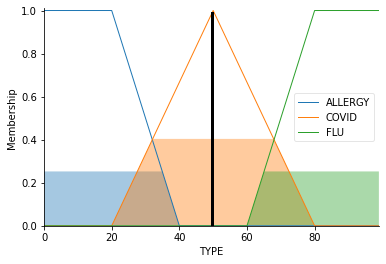

In [19]:
#Once computed, we can view the result as well as visualize it.
print(TYPING.output['TYPE'])
TYPE.view(sim=TYPING)